<a href="https://colab.research.google.com/github/DeepabaliChoudhury/UD_Intro_DeepabaliChoudhury/blob/main/kmeans_image_to_colours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(-0.5, 1359.5, 944.5, -0.5)

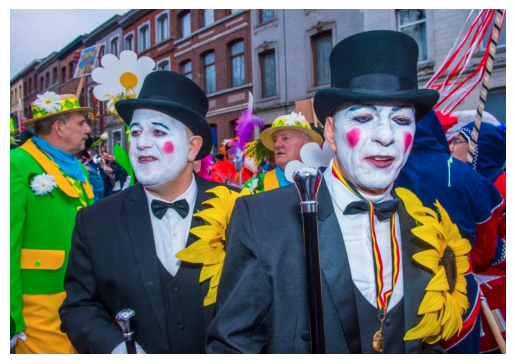

In [ ]:
# Load sample image
path = '/content/drive/My Drive/images/colab.2.jpg'
img = plt.imread(path)
plt.imshow(img)
plt.axis('off')

In [ ]:
# Reshape the image to be a list of pixels
img_flat = img.reshape((-1, 3))


In [ ]:
# Shuffle the pixel values to avoid initialization bias
img_flat = shuffle(img_flat, random_state=30)


In [ ]:
# Use KMeans to cluster the pixel values
n_colors = 5
kmeans = KMeans(n_clusters=n_colors, random_state=30, n_init=10)
kmeans.fit(img_flat)

KMeans(n_clusters=5, n_init=10, random_state=30)

In [ ]:
# Get cluster centers and labels
colors = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
# Print and visualize cluster centers
print("Cluster Centers:")
print(colors)

Cluster Centers:
[[120.34650459 114.97504781 140.80708799]
 [208.25515816 146.56990749  27.63189317]
 [ 39.2410744   44.96476096  63.92562254]
 [185.68926559 194.96115177 219.37905033]
 [  5.96515542 151.70456449  15.96452313]]


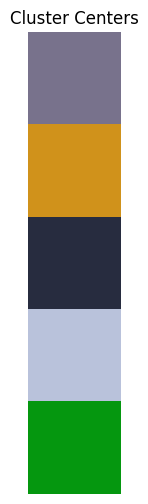

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Cluster Centers")
plt.imshow(colors.reshape(-1, 1, 3).astype(np.uint8))
plt.axis('off')
plt.show()

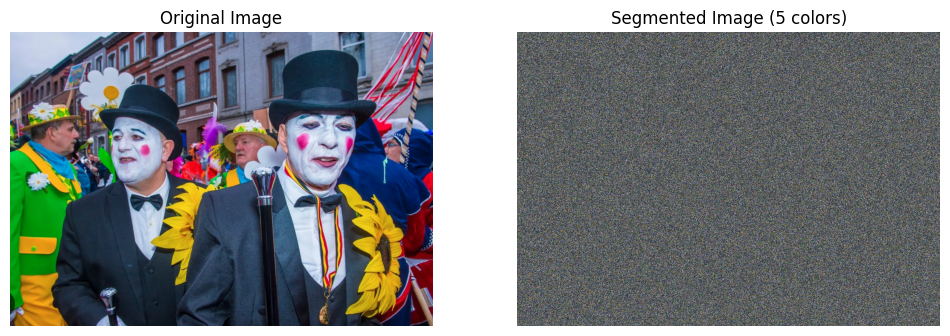

In [ ]:
# Replace each pixel with its corresponding cluster center
img_reconstructed = np.reshape(colors[labels], (img.shape))

# Convert to uint8 data type and scale back to [0, 255]
img_reconstructed = np.clip(img_reconstructed.astype('uint8'), 0, 255)

# Display the original and segmented images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(img)
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(img_reconstructed)
ax2.set_title("Segmented Image ({} colors)".format(n_colors))
ax2.axis('off')

plt.show()